In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
bank=pd.read_csv("D:/dataset/bank-full.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.shape

(45211, 17)

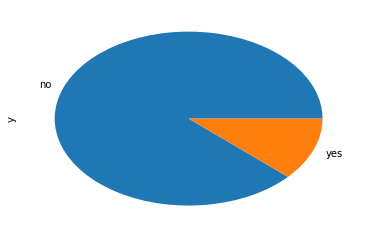

In [5]:
%matplotlib inline

(bank['y'].value_counts()/bank.shape[0]*100).plot.pie()

In [6]:
bank_dummies=pd.get_dummies(bank.drop('y',axis=1))
bank_dummies['y']=bank['y']

1. fit a decision tree with max_depth as 10
     - calculate accuracy, sensitivity and specificity
2. fit a random Forest model with n_estimators = 300
    - calculate accuracy, sensitivity and specificity

In [8]:
train,test=train_test_split(bank_dummies,test_size=0.3,random_state=100)

train_x = train.drop('y', axis=1)
train_y = train['y']

test_x = test.drop('y', axis=1)
test_y = test['y']

model = DecisionTreeClassifier(random_state=100, max_depth=3)
model.fit(train_x, train_y)
#print(model.predict([bank_dummies.loc[100].drop('y')]))
#draw_tree(model, train_x.columns)

pred_test = model.predict(test_x)
pred_results = pd.DataFrame({
    'actual': test_y,
    'predicted': pred_test
})

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(pred_results['actual'], pred_results['predicted'])

tn,fp,fn,tp= confusion_matrix(pred_results['actual'],pred_results['predicted']).ravel()#to flatten the matrix(convert 2D array to 1D)

print(classification_report(pred_results['actual'],pred_results['predicted']))

             precision    recall  f1-score   support

         no       0.91      0.98      0.94     11985
        yes       0.64      0.30      0.41      1579

avg / total       0.88      0.90      0.88     13564



In [25]:
train, test = train_test_split(bank_dummies,
                              test_size = 0.3,
                              random_state = 100)

train_x = train.drop('y', axis = 1)
train_y = train['y']

test_x = test.drop('y', axis = 1)
test_y = test['y']

predictions=[]
for i in range(300):

    # Random Pick Row
    samples_dt1 = train_x.sample(1029, replace = True)
    samples_dt1.shape

    # Randomly picks the columns
    all_columns = pd.Series(train_x.columns)
    ncols = int(np.sqrt(len(all_columns)))
    #print(ncols)
    random_columns = all_columns.sample(ncols).values
    random_columns

    samples_dt1 = samples_dt1[random_columns]
    samples_dt1

    # we will not use max_depth as we want the random forest to grow completely. althought it would be biased still we will be using it
    model = DecisionTreeClassifier()
    model.fit(samples_dt1, train_y.loc[samples_dt1.index])
    pred = model.predict([test_x.iloc[0][random_columns]])[0]
    predictions.append(pred)
    #print(pred)
pd.Series(predictions).value_counts()

no     292
yes      8
dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state=100,n_estimators=300)
model_rf.fit(train_x,train_y)
pred=model_rf.predict(test_x)
print(accuracy_score(test_y,pred))
print(classification_report(test_y, pred))

0.9054113830728399
             precision    recall  f1-score   support

         no       0.93      0.97      0.95     11985
        yes       0.65      0.41      0.50      1579

avg / total       0.89      0.91      0.90     13564



In [75]:
population=pd.Series(list(range(100)))
population.sample(100,replace=True).nunique()

60